In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
import seaborn as sns

## Import data

In [161]:
dtype = np.dtype([("cores", int), ("duration", int)])
#inputdata = np.loadtxt("stats_ralf.csv", dtype=dtype, delimiter=',', usecols=(0, 1), unpack=True)
#inputdata = np.loadtxt("all-2023.csv", dtype=dtype, delimiter=',', usecols=(0, 1), unpack=True)
#inputdata = np.loadtxt("Lake-2023.csv", dtype=dtype, delimiter=',', usecols=(0, 1), unpack=True)
#inputdata = np.loadtxt("E5-2023.csv", dtype=dtype, delimiter=',', usecols=(0, 1), unpack=True)
#inputdata = np.loadtxt("Cascade-2023.csv", dtype=dtype, delimiter=',', usecols=(0, 1), unpack=True)
inputdata = np.loadtxt("Epyc-2023.csv", dtype=dtype, delimiter=',', usecols=(0, 1), unpack=True)

In [162]:
print(f"total nb of datasets: {len(inputdata[0])}")

total nb of datasets: 30681


In [163]:
inputdataarray = np.array(inputdata)

In [164]:
print(inputdata[0][1])

32


In [165]:
print(inputdataarray[0][1])

32


In [166]:
print(inputdataarray[1][1])

119637


## Histogram of number of cores used

In [167]:
max_ncore_bin_log2=int(np.floor(np.max(np.log2(inputdataarray[0])))+1)

(array([2.390e+04, 4.600e+01, 1.100e+01, 6.065e+03, 3.430e+02, 1.480e+02,
        9.000e+00, 1.510e+02, 6.000e+00, 2.000e+00, 0.000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5]),
 <BarContainer object of 11 artists>)

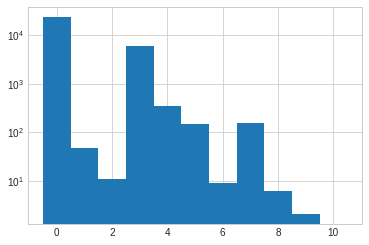

In [168]:
plt.hist(np.log2(inputdataarray[0]), 
         bins = max_ncore_bin_log2+1,
         range=(-0.5,max_ncore_bin_log2+0.5), 
         log=True)

In [169]:
print(np.arange(0,max_bin_log2))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [170]:
print(2**np.arange(0,max_bin_log2))

[   1    2    4    8   16   32   64  128  256  512 1024 2048 4096]


In [171]:
ncore_hist, ncore_hist_edges = np.histogram(np.log2(inputdataarray[0]),
                                            bins = max_ncore_bin_log2+1, 
                                            range=(-0.5,max_ncore_bin_log2+0.5))

In [172]:
ncore_hist_centers = np.delete(ncore_hist_edges + np.roll(ncore_hist_edges,1),0)
ncore_hist_centers 

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

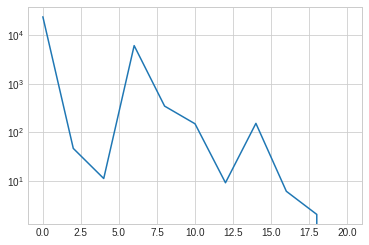

In [173]:
plt.plot(ncore_hist_centers,ncore_hist)
plt.yscale('log')

## Histogram of job durations

In [174]:
min_time_bin_log2=int(np.floor(np.min(np.log2(inputdataarray[1]+0.1)))+1)
max_time_bin_log2=int(np.floor(np.max(np.log2(inputdataarray[1]+0.1)))+1)

(array([  29.,  161.,  423., 1229., 7959., 8680., 3718., 3868., 2163.,
         677.,  449.,  229.,  518.,  187.,  146.,   72.,   91.,   26.,
          53.,    0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <BarContainer object of 20 artists>)

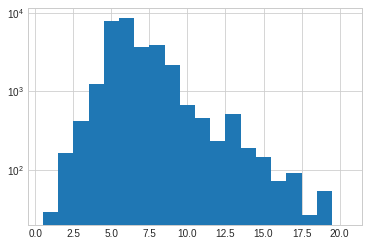

In [175]:
plt.hist(np.log2(inputdataarray[1]+0.1), 
         bins = max_time_bin_log2-min_time_bin_log2+1, 
         range=(min_time_bin_log2-0.5,max_time_bin_log2+0.5), log=True)

In [176]:
print(np.arange(min_time_bin_log2,max_time_bin_log2))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [177]:
print(2.**np.arange(min_time_bin_log2,max_time_bin_log2))

[2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01 6.40000e+01
 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03 4.09600e+03
 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05 2.62144e+05
 5.24288e+05]


In [178]:
time_hist, time_hist_edges = np.histogram(np.log2(inputdataarray[1]+0.1),
                                          bins = max_time_bin_log2-min_time_bin_log2+1, 
                                          range=(min_time_bin_log2-0.5,max_time_bin_log2+0.5))

In [179]:
time_hist_centers = np.delete(time_hist_edges + np.roll(time_hist_edges,1),0)
time_hist_centers 

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30., 32., 34., 36., 38., 40.])

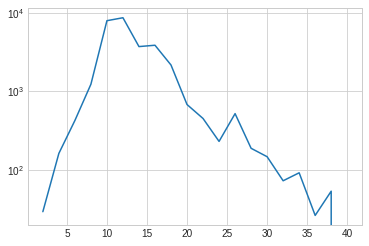

In [180]:
plt.plot(time_hist_centers,time_hist)
plt.yscale('log')

## 2d Histogram of number of cores used and job duration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


(array([[7.000e+00, 1.500e+01, 2.700e+01, 3.460e+02, 3.706e+03, 8.603e+03,
         3.679e+03, 3.772e+03, 2.064e+03, 5.950e+02, 2.170e+02, 1.900e+02,
         4.600e+02, 1.450e+02, 1.700e+01, 1.200e+01, 2.600e+01, 1.400e+01,
         2.000e+00, 0.000e+00],
        [0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 1.500e+01, 3.000e+00,
         4.000e+00, 2.000e+00, 0.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
         3.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [2.000e+00, 5.100e+01, 3.680e+02, 8.760e+02, 4.242e+03, 5.000e+01,
         2.200e+01, 8.400e+01, 8.300e+01, 6.500e+01, 1.790e+02, 1.000e+00,
         3.000e+00, 1.800e+01, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
    

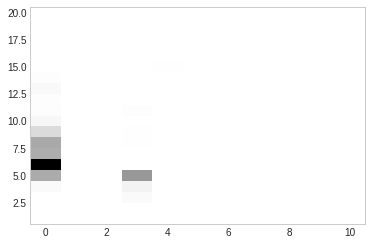

In [181]:
plt.hist2d(np.log2(inputdataarray[0]),
           np.log2(inputdataarray[1]+0.1), 
           bins = [max_ncore_bin_log2+1,max_time_bin_log2-min_time_bin_log2+1],
           range=[[-0.5,max_ncore_bin_log2+0.5], [min_time_bin_log2-0.5,max_time_bin_log2+0.5]])

In [182]:
ncore_time_hist, ncore_hist_edges, time_hist_edges = np.histogram2d(np.log2(inputdataarray[0]),
                                                                    np.log2(inputdataarray[1]+0.1), 
                                                                    bins = [max_ncore_bin_log2+1,
                                                                            max_time_bin_log2-min_time_bin_log2+1],
                                                                    range=[[-0.5,max_ncore_bin_log2+0.5],
                                                                           [min_time_bin_log2-0.5,max_time_bin_log2+0.5]])

In [183]:
ncore_hist_edges

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5])

In [184]:
time_hist_edges

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])

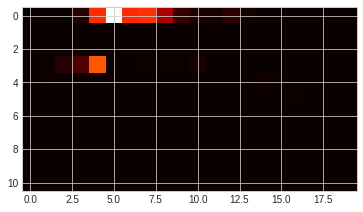

In [185]:
plt.imshow(ncore_time_hist, cmap='hot') 

In [186]:
ncore_time_hist.shape

(11, 20)

In [187]:
time_hist_centers.shape

(20,)

In [188]:
ncore_time_consumption = np.log2(np.transpose(np.transpose(ncore_time_hist*2.**time_hist_centers)*2.**ncore_hist_centers+0.000000001))

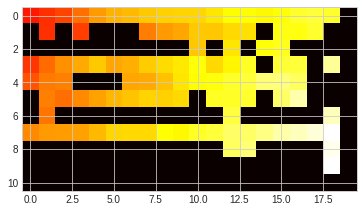

In [189]:
plt.imshow(ncore_time_consumption, cmap='hot') 

([<matplotlib.axis.XTick at 0x7f0800abb6d8>,
 [Text(2.0, 0, '4.0'),
  Text(4.0, 0, '16.0'),
  Text(6.0, 0, '64.0'),
  Text(8.0, 0, '256.0'),
  Text(10.0, 0, '1024.0'),
  Text(12.0, 0, '4096.0'),
  Text(14.0, 0, '16384.0'),
  Text(16.0, 0, '65536.0'),
  Text(18.0, 0, '262144.0'),
  Text(20.0, 0, '1048576.0'),
  Text(22.0, 0, '4194304.0'),
  Text(24.0, 0, '16777216.0'),
  Text(26.0, 0, '67108864.0'),
  Text(28.0, 0, '268435456.0'),
  Text(30.0, 0, '1073741824.0'),
  Text(32.0, 0, '4294967296.0'),
  Text(34.0, 0, '17179869184.0'),
  Text(36.0, 0, '68719476736.0'),
  Text(38.0, 0, '274877906944.0'),
  Text(40.0, 0, '1099511627776.0')])

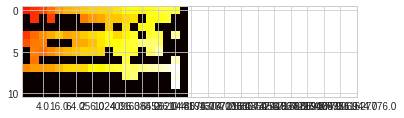

In [190]:
plt.imshow(ncore_time_consumption, cmap='hot') 
plt.xticks(ticks = time_hist_centers,
           labels = 2.**time_hist_centers)

TODO ticks:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html

https://www.askpython.com/python-modules/matplotlib/colorplotting-2d-array-matplotlib

## core time consumed as a function of number of cores

In [191]:
inputdata[0].size

30681

In [192]:
number_of_cores = np.arange(np.max(inputdata[0]) + 1)
number_of_cores

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [193]:
total_time_by_number_of_cores = np.zeros(np.max(inputdata[0]) + 1) 
total_core_time_by_number_of_cores = np.zeros(np.max(inputdata[0]) + 1)

In [194]:
for job in range(inputdata[0].size):
    n_job = inputdata[0][job]
    t_job = inputdata[1][job]
    total_time_by_number_of_cores[n_job] += t_job
    total_core_time_by_number_of_cores[n_job] += n_job * t_job

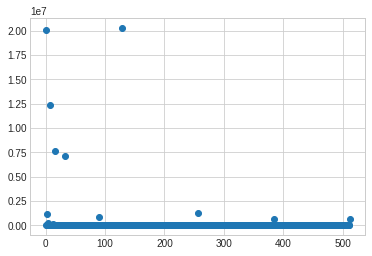

In [195]:
plt.scatter(number_of_cores,total_time_by_number_of_cores)

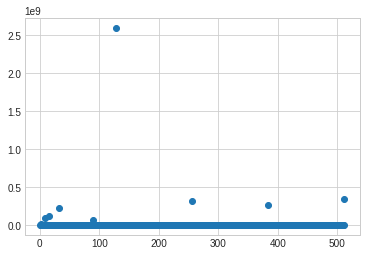

In [196]:
plt.scatter(number_of_cores,total_core_time_by_number_of_cores)